In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston_datasets=load_boston()

In [4]:
boston_datasets.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
len(boston_datasets.feature_names)

13

In [6]:
boston=pd.DataFrame(boston_datasets.data,columns=boston_datasets.feature_names)

In [7]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
boston["MEDV"]=boston_datasets.target

In [9]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
import seaborn as sns

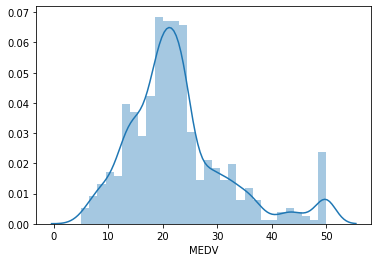

In [12]:
sns.distplot(boston.MEDV,bins=30)

### boston房價大約集中在20萬，但較貴的豪宅的數量不再常態分配裡面

#### 選擇標準差最小的兩個數據

In [25]:
X=boston.loc[:,["CHAS","NOX"]].values
Y=boston.MEDV

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [16]:
len(x_train)

404

In [17]:
len(x_test)

102

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model=LinearRegression()

In [20]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
y_predict=model.predict(x_test)

### 預設值-正確答案

In [22]:
y_predict-y_test#知到高估或低估

329     3.108552
371   -30.679114
219     6.346142
403     8.704890
78      5.367712
15      2.894880
487     0.513915
340     4.954040
310     6.470752
102     4.867266
418     8.727857
411     3.390949
446     0.349216
386     6.243407
162   -22.708371
299    -1.050161
480     0.019009
196    -5.499580
175    -5.559186
37      3.251716
320     0.675845
171     1.192110
107     3.067266
278    -2.905835
45      6.856810
367    -3.779114
21      3.194880
153    -9.044259
97    -12.431126
113     3.758687
         ...    
65      4.524548
344    -6.387962
481    -0.680991
387     9.343407
233   -24.347122
206     0.225264
90      2.025264
497     2.739206
239     3.603905
137     2.482370
407    -9.625047
224   -20.735058
225   -25.935058
326     1.475845
96      4.868874
426    10.876561
159   -12.944259
391    -6.456593
54      8.676291
435     1.849216
254     6.348677
300     3.149839
505     9.587463
246     2.491841
374     4.138760
56      2.876291
455     2.157795
60      7.2700

In [23]:
sns.set()#讓圖變高級

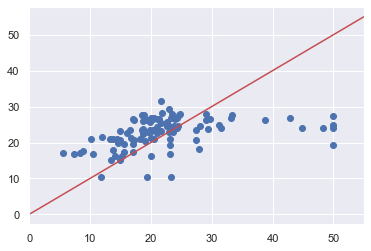

In [26]:
plt.scatter(y_test,y_predict)#正確答案和預測答案
plt.xlim(0,55)
plt.plot([0,55],[0,55],'r')
plt.x_label=("REAL MEDV")
plt.y_label=("PRIDICTED MEDV")

### 高價房子均被低估
### 10-20萬之間的房子多數被高估，少數預測一致，少數被低估